In [1]:
library(Seurat)
library(ggplot2)
library(Matrix)
library(DoubletFinder)
library(dplyr) # for functions

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
seurat1 <- readRDS(file = "~/data/retina/h5ad/2_09_24_FIG1_embed.rds")

In [4]:
seurat2<-subset(x = seurat1, idents = c('RPE', 'Melano'), invert = FALSE)

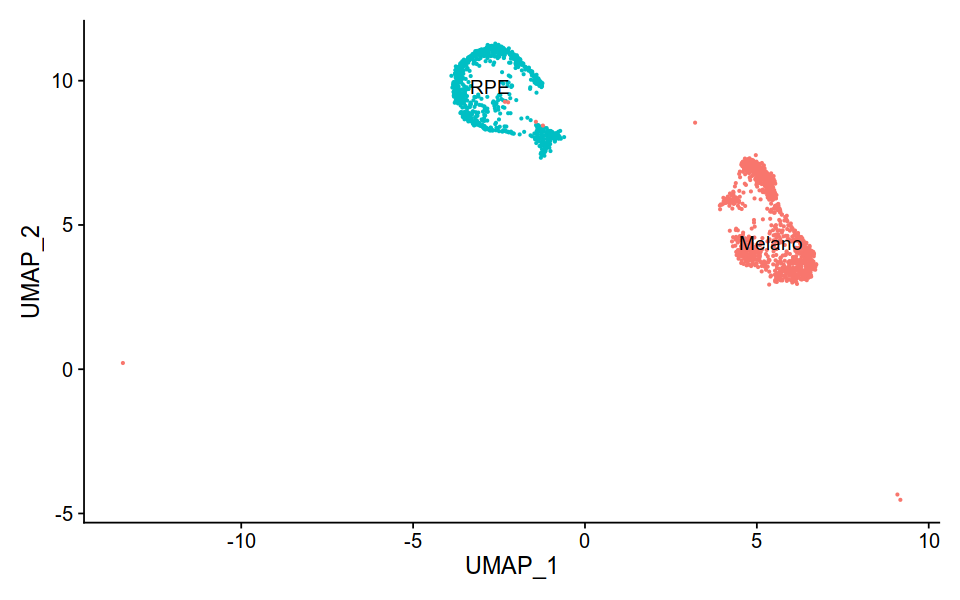

In [5]:
options(repr.plot.width = 8, repr.plot.height =5)
DimPlot(seurat2, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [6]:
seurat2.markers <- FindAllMarkers(seurat2, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
seurat2.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster Melano

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster RPE



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
7.910036e-61,5.737980,0.305,0.017,2.553755e-56,Melano,Snhg7os
4.052409e-78,4.967494,0.386,0.027,1.308320e-73,Melano,Pax3
4.381570e-84,5.580526,0.324,0.005,1.414590e-79,RPE,Gm534
5.213263e-68,5.427194,0.268,0.004,1.683102e-63,RPE,Car10


In [7]:
cl_Melano<-filter(seurat2.markers, cluster %in% c('Melano') & avg_log2FC > 2 )$gene  
cl_Melano

[1] "Pmel"           "Dct"            "Tyrp1"          "Gstp1"         
  [5] "Gpnmb"          "Ednrb"          "Mlana"          "Dkk3"          
  [9] "Mlph"           "Selenop"        "S100b"          "Mgll"          
 [13] "Aebp1"          "Anxa5"          "Syt4"           "Atp1a1"        
 [17] "Slc45a2"        "Phlda1"         "Spp1"           "Fos"           
 [21] "Myo5a"          "Cited1"         "Slc24a5"        "Rab38"         
 [25] "Sparcl1"        "Gjb6"           "Gjb2"           "Nrp2"          
 [29] "Fxyd1"          "C2"             "Sat1"           "Ncam1"         
 [33] "Ndrg1"          "Ahnak2"         "Cited2"         "Scn8a"         
 [37] "Cdk2"           "Trpm1"          "Bmyc"           "Hpse"          
 [41] "Fmn1"           "Paqr6"          "Fxyd6"          "Il10rb"        
 [45] "Fabp3"          "Atp1b3"         "Plp1"           "Cav1"          
 [49] "Stmn3"          "Mcoln3"         "Tinagl1"        "Ahnak"         
 [53] "Mef2c"          "Qpct"           "Gm4876"         "Emp3"          
 [57] "Rap2b"          "Nrcam"          "Pax3"           "Aph1c"         
 [61] "Art3"           "Adm"            "Cck"            "Insc"          
 [65] "Syngr1"         "Scrg1"          "Mylk"           "H2-D1"         
 [69] "Ptprs"          "Pianp"          "Gpx3"           "Chsy3"         
 [73] "Tecpr1"         "Lrrfip1"        "Bace2"          "Csrp1"         
 [77] "Lmna"           "Srsf7"          "Fstl4"          "Snhg7os"       
 [81] "Lgi4"           "Fam174b"        "Cmtm5"          "Ier2"          
 [85] "Hhatl"          "Dlc1"           "Cyp2j6"         "Sgcd"          
 [89] "Eya1"           "Edil3"          "Glrb"           "Ccnd2"         
 [93] "Rbpms"          "Snca"           "Arhgap31"       "Ugp2"          
 [97] "Smyd2"          "Arap2"          "Id4"            "Mpzl1"         
[101] "Tbx1"           "Igsf8"          "Tns1"           "Fosb"          
[105] "Txnip"          "C2cd4b"         "Neat1"          "Hmcn1"         
[109] "Slc4a8"         "Fam53b"         "Eogt"           "Bcl2"          
[113] "Snhg11"         "Tob1"           "Gm2115"         "CAAA01147332.1"
[117] "Lima1"          "Snx1"           "Adgb"           "Sertad1"       
[121] "Pam"            "Idh2"           "Rnase4"         "Mmgt2"         
[125] "Cers6"          "Cav2"           "5031439G07Rik"  "Plagl1"        
[129] "Fez1"           "Cort"           "Fxyd2"          "Taf1d"         
[133] "Rhog"           "Gm26802"        "C4b"            "Anxa1"         
[137] "Tmod1"          "Specc1"         "Insig2"         "Cdh1"          
[141] "Ago2"           "Ier5"           "Myadm"          "Pde4d"         
[145] "Endod1"         "Jam2"           "Mmp14"          "Plekha5"       
[149] "Lta4h"          "Gpr137b"        "Mical3"         "Psen2"         
[153] "Fkbp9"          "4930402H24Rik"  "Pakap.1"        "Hsd17b11"      
[157] "Mob3b"          "Nipal3"         "Slc38a2"        "Gnb4"          
[161] "Gucy2f"         "Lyst"           "Hbegf"          "Eng"           
[165] "Itga9"          "Retreg1"        "Gpc1"           "Scly"          
[169] "Plk2"           "Tmem140"        "Cdh19"          "Prelp"         
[173] "Pik3r3"         "Nceh1"          "Hspa1a"         "Epb41l2"       
[177] "Mpdz"           "Nav2"           "Plxdc2"         "Tmem109"       
[181] "Osbpl6"         "Gng11"          "Ppfibp1"        "Prdx4"         
[185] "Zmiz1"          "Phlda3"         "Cped1"          "Coro1c"        
[189] "Tpd52l1"        "Hexim1"         "St6gal1"        "Dcaf6"         
[193] "Cerk"

In [8]:
cl_RPE<-filter(seurat2.markers, cluster %in% c('RPE') & avg_log2FC > 2 )$gene  
cl_RPE

[1] "Trpm3"         "Rpe65"         "Slc16a8"       "Rgr"          
  [5] "Col9a3"        "Rdh5"          "Rlbp1"         "Ttr"          
  [9] "Krt18"         "Cspg5"         "Col8a1"        "Clu"          
 [13] "Inpp5k"        "Otx2"          "Slc1a1"        "Slc6a13"      
 [17] "Ermn"          "Slc6a20a"      "Stra6"         "Kif1a"        
 [21] "Lrat"          "Slc4a5"        "Slc7a10"       "Car12"        
 [25] "Rbp1"          "Acsl6"         "Pltp"          "Cst3"         
 [29] "Trf"           "Arl6ip1"       "Mt3"           "Slc24a1"      
 [33] "Rdh10"         "Pon1"          "Col4a4"        "Abca4"        
 [37] "Phgdh"         "Itgb8"         "Rd3l"          "Sema3c"       
 [41] "Cdr2"          "Rrh"           "Cltrn"         "Bmp4"         
 [45] "Krt8"          "Nt5dc2"        "Slc2a1"        "Otx2os1"      
 [49] "Col8a2"        "Tshr"          "Gpam"          "Bsg"          
 [53] "Tmem98"        "Ociad2"        "Six3os1"       "Sgk1"         
 [57] "Basp1"         "Cpxm2"         "Baiap2l2"      "Clic6"        
 [61] "Atp1b1"        "Myrf"          "Ezr"           "Prcd"         
 [65] "Tes"           "Slc16a1"       "Six3"          "Rsph10b"      
 [69] "Flvcr2"        "Dbp"           "Abhd2"         "Slc6a9"       
 [73] "Slc6a6"        "Fap"           "Unc119"        "Ccnd1"        
 [77] "Gm15222"       "Rom1"          "Rhobtb2"       "Gldc"         
 [81] "Rbm47"         "Iqgap2"        "Slc22a8"       "Col4a3"       
 [85] "Tmem72"        "Sulf1"         "Sv2b"          "Rtn1"         
 [89] "Gm45895"       "Lrp8"          "Il17re"        "Enpp2"        
 [93] "Fam13a"        "Plce1"         "Slc9a3r1"      "Slco1a4"      
 [97] "Slc38a3"       "Vegfa"         "Gnao1"         "Slc16a9"      
[101] "Fads3"         "Jakmip2"       "Crim1"         "Tmem56"       
[105] "Pak7"          "Sorbs2"        "4933429O19Rik" "Cldn1"        
[109] "Gabrb3"        "Vat1l"         "Parm1"         "Wfdc2"        
[113] "Calml4"        "Cfh"           "Lmo1"          "Csf1r"        
[117] "Myrip"         "Tmem108"       "A2m"           "Fads2"        
[121] "Adra2c"        "Fzd4"          "Col18a1"       "Dlgap1"       
[125] "Dapl1"         "Mogat1"        "Rgs9"          "Slc4a2"       
[129] "Perp"          "Rnf152"        "Cyp4f17"       "Vasn"         
[133] "Sorl1"         "Cntnap2"       "Slco1c1"       "Sfrp1"        
[137] "Lrp2"          "Ntrk2"         "Pip5k1b"       "Thbs4"        
[141] "Alad"          "Csad"          "Gm973"         "Spon1"        
[145] "Dmpk"          "Upk3bl"        "Nqo1"          "Adora2b"      
[149] "Zfp385a"       "Sostdc1"       "Fgfr2"         "Osbp2"        
[153] "Atp2b2"        "Wdr6"          "Myh14"         "Gmpr"         
[157] "Tmem237"       "Nap1l5"        "Tmem229b"      "Pigz"         
[161] "Vldlr"         "Zfp385b"       "Slc19a1"       "Rogdi"        
[165] "Thbs1"         "Ildr2"         "Gm3764"        "Zfp579"       
[169] "Kank1"         "Cd82"          "Slc16a6"       "A930028N01Rik"
[173] "Gm48956"       "Cox8b"         "Slc39a12"      "Bmp2"         
[177] "Polr3e"        "Pde4dip"       "Cdh3"          "Paqr9"        
[181] "Tuft1"         "Padi2"         "Smim1"         "Cxadr"        
[185] "Osmr"          "Prdm16os"      "Ccdc74a"       "Acad11"       
[189] "Gm525"         "Vit"           "Gja1"          "Trhde"        
[193] "St6galnac2"    "Tc2n"          "Rimklb"        "Nrep"         
[197] "Clcn2"         "Wwc1"          "Gzmm"          "Spock1"       
[201] "Man1a"         "Arhgef18"      "Prdm16"        "Slc39a4"      
[205] "Rpgrip1"       "Wfikkn2"       "Coro2b"        "Lhx2"         
[209] "Kcnq4"         "Fcor"          "Nid2"          "Plk5"         
[213] "Ptpn13"        "Mfrp"          "Gdf11"         "Sfrp5"        
[217] "Amer1"         "Pcx"           "Bcat1"         "Nog"          
[221] "Phlpp2"        "Spire2"        "Tbc1d2"        "Rmdn3"        
[225] "Slc13a3"       "Aco1"          "Galnt10"       "Abcc1"        
[229] "Azin2

In [9]:
seurat2 <- RunPCA(seurat2, features = VariableFeatures(object = seurat2))

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 6 features requested have zero variance (running reduction without them): Trav9-1, Gzmc, Igkv4-68, Ripply1, Slc5a10, Fam162b”
PC_ 1 
Positive:  Igfbp4, Klf2, Gsn, Bgn, Mgp, Dcn, Tmsb4x, S100a6, Crip1, Atf3 
	   Lum, Serpinf1, Irf1, Vim, Plpp3, Gadd45g, Icam1, Emcn, Fbln1, Mfap5 
	   Cdkn1c, Col1a1, Col1a2, Lbp, Ier3, Cxcl1, Pgf, Emp1, Crispld2, H2-D1 
Negative:  Ttr, Ptgds, Col9a3, Slc16a8, Slc6a13, Cspg5, Stra6, Trpm3, Slc6a20a, Rdh5 
	   Otx2, Car14, Rgr, Rd3l, Car12, Krt18, Rpe65, Pon1, Rrh, Slc7a10 
	   Cst3, Cltrn, Slc4a5, Gm15222, Acsl6, Otx2os1, Arl6ip1, Ermn, Rsph10b, Krt8 
PC_ 2 
Positive:  Bgn, Igfbp4, Klf2, Mgp, Gpc3, Myl6, Dcn, Pltp, Serpinf1, Lum 
	   Col8a1, Slc6a6, Timp3, Sgk1, S100a6, Gsn, Rbp1, Gadd45g, Cfh, Atf3 
	   Fstl1, Emcn, Cdkn1c, Loxl1, Icam1, Mfap5, Fbln1, Col1a2, Col1a1, Lbp 
Negative:  Pmel, Slc45a2, Rab38, Mlph, Gjb6, Syt4, Tyrp1, Gpnmb, Dct, Ednrb 
	   Mlana

In [10]:
seurat2 <- RunPCA(seurat2, features = VariableFeatures(object = seurat2))

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 6 features requested have zero variance (running reduction without them): Trav9-1, Gzmc, Igkv4-68, Ripply1, Slc5a10, Fam162b”
PC_ 1 
Positive:  Igfbp4, Klf2, Gsn, Bgn, Mgp, Dcn, Tmsb4x, S100a6, Crip1, Atf3 
	   Lum, Serpinf1, Irf1, Vim, Plpp3, Gadd45g, Icam1, Emcn, Fbln1, Mfap5 
	   Cdkn1c, Col1a1, Col1a2, Lbp, Ier3, Cxcl1, Pgf, Emp1, Crispld2, H2-D1 
Negative:  Ttr, Ptgds, Col9a3, Slc16a8, Slc6a13, Cspg5, Stra6, Trpm3, Slc6a20a, Rdh5 
	   Otx2, Car14, Rgr, Rd3l, Car12, Krt18, Rpe65, Pon1, Rrh, Slc7a10 
	   Cst3, Cltrn, Slc4a5, Gm15222, Acsl6, Otx2os1, Arl6ip1, Ermn, Rsph10b, Krt8 
PC_ 2 
Positive:  Bgn, Igfbp4, Klf2, Mgp, Gpc3, Myl6, Dcn, Pltp, Serpinf1, Lum 
	   Col8a1, Slc6a6, Timp3, Sgk1, S100a6, Gsn, Rbp1, Gadd45g, Cfh, Atf3 
	   Fstl1, Emcn, Cdkn1c, Loxl1, Icam1, Mfap5, Fbln1, Col1a2, Col1a1, Lbp 
Negative:  Pmel, Slc45a2, Rab38, Mlph, Gjb6, Syt4, Tyrp1, Gpnmb, Dct, Ednrb 
	   Mlana

In [11]:
seurat2 <- FindNeighbors(seurat2, dims = 1:20)
seurat2 <- FindClusters(seurat2, resolution = 0.01)
seurat2 <- RunUMAP(seurat2, dims = 1:20)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1902
Number of edges: 74390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9938
Number of communities: 2
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:12:02 UMAP embedding parameters a = 0.9922 b = 1.112

10:12:02 Read 1902 rows and found 20 numeric columns

10:12:02 Using Annoy for neighbor search, n_neighbors = 30

10:12:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:12:02 Writing NN index file to temp file /tmp/Rtmpi5Kxle/file1c5474d80f8

10:12:02 Searching Annoy index using 1 thread, search_k = 3000

10:12:02 Annoy recall = 100%

10:12:03 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

In [12]:
saveRDS(seurat2, file = "~/data//retina/h5ad/1_09_RDE_Melano_reclaster_clasters.rds")

In [13]:
seurat2 <- readRDS(file = "~/data//retina/h5ad/1_09_RDE_Melano_reclaster_clasters.rds")

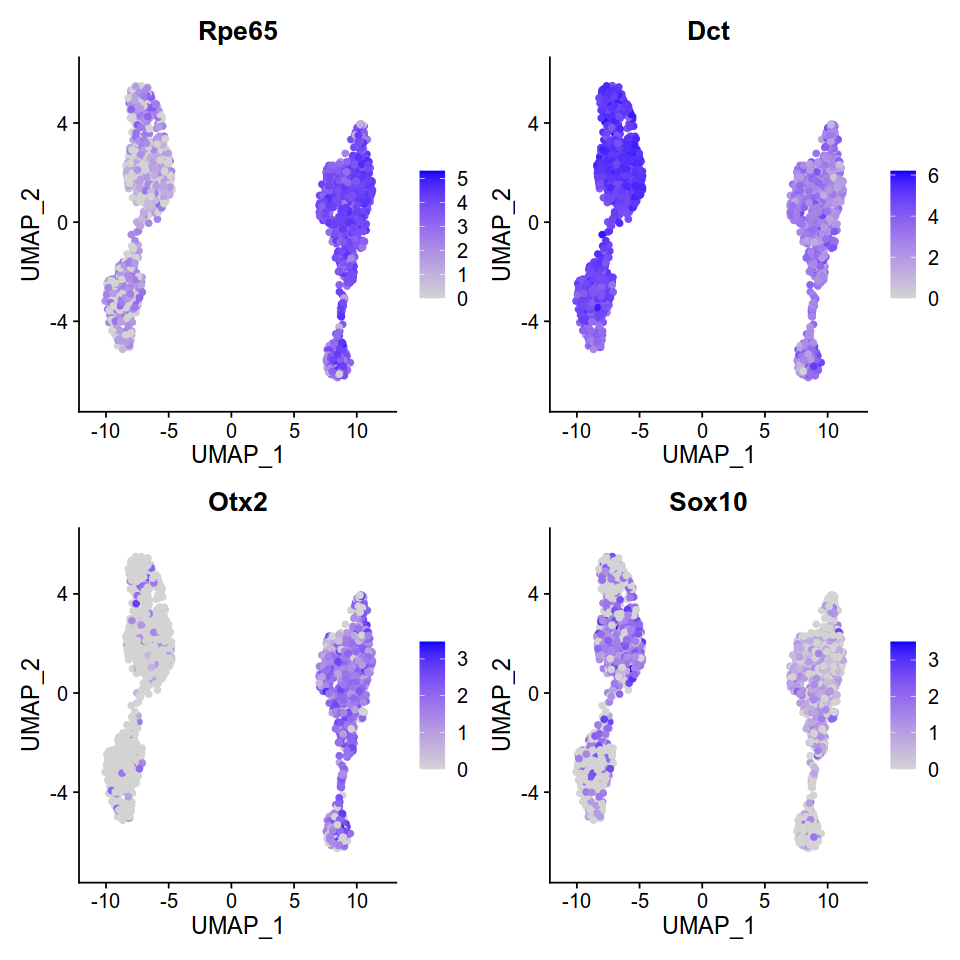

In [14]:
options(repr.plot.width = 8, repr.plot.height =8)
FeaturePlot(seurat2, c( "Rpe65",  "Dct", 'Otx2', 'Sox10'), raster.dpi = c(512, 512),label.size = 2,pt.size=1.5)

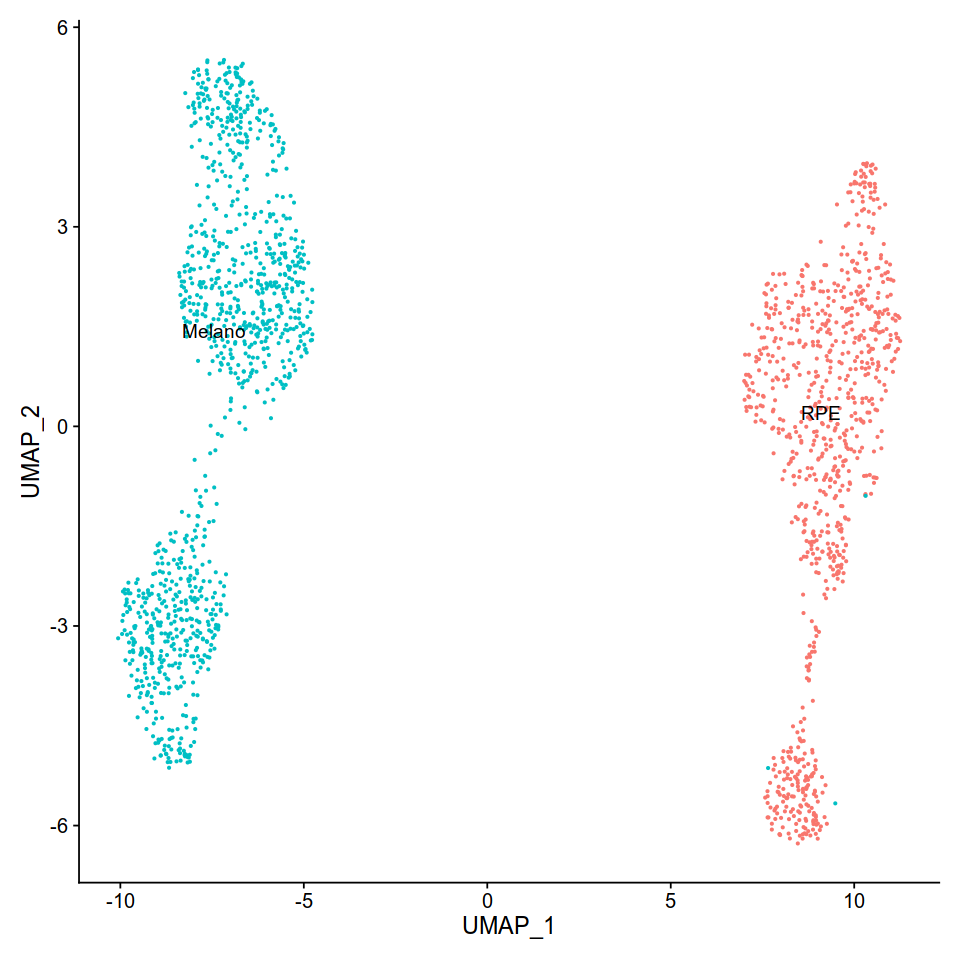

In [16]:
new.cluster.ids <- c("RPE", "Melano")
names(new.cluster.ids) <- levels(seurat2)
seurat2 <- RenameIdents(seurat2, new.cluster.ids)
DimPlot(seurat2, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [17]:
seurat2.markers <- FindAllMarkers(seurat2, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
seurat2.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster RPE

Calculating cluster Melano



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.254893e-84,5.589740,0.325,0.005,4.051423e-80,RPE,Gm534
1.906885e-68,5.436407,0.269,0.004,6.156377e-64,RPE,Car10
2.584557e-61,6.019463,0.305,0.015,8.344243e-57,Melano,Snhg7os
6.865418e-47,5.055940,0.254,0.019,2.216500e-42,Melano,Snhg11


In [26]:
cl_Melano<-filter(seurat2.markers, cluster %in% c('Melano') & avg_log2FC > 3.5 )$gene  
cl_Melano
cat(strwrap(paste(sprintf("\"%s\"", cl_Melano), collapse=", "), width=140),sep="\n")

[1] "Pmel"     "Ednrb"    "Mlana"    "Dkk3"     "Mlph"     "Aebp1"   
 [7] "Syt4"     "Slc45a2"  "Spp1"     "Cited1"   "Rab38"    "Gjb6"    
[13] "Gjb2"     "Nrp2"     "C2"       "Ncam1"    "Ahnak2"   "Scn8a"   
[19] "Cdk2"     "Hpse"     "Fmn1"     "Fxyd6"    "Paqr6"    "Fabp3"   
[25] "Cav1"     "Stmn3"    "Mcoln3"   "Tinagl1"  "Qpct"     "Gm4876"  
[31] "Rap2b"    "Nrcam"    "Pax3"     "Art3"     "Adm"      "Cck"     
[37] "Insc"     "Scrg1"    "Pianp"    "Chsy3"    "Lrrfip1"  "Fstl4"   
[43] "Snhg7os"  "Lgi4"     "Cmtm5"    "Hhatl"    "Dlc1"     "Sgcd"    
[49] "Eya1"     "Edil3"    "Glrb"     "Arhgap31" "Snca"     "Smyd2"   
[55] "Tbx1"     "C2cd4b"   "Slc4a8"   "Snhg11"   "Fam53b"   "Adgb"    
[61] "Plagl1"   "Fez1"     "Cort"     "C4b"

"Pmel", "Ednrb", "Mlana", "Dkk3", "Mlph", "Aebp1", "Syt4", "Slc45a2", "Spp1", "Cited1", "Rab38", "Gjb6", "Gjb2", "Nrp2", "C2", "Ncam1",
"Ahnak2", "Scn8a", "Cdk2", "Hpse", "Fmn1", "Fxyd6", "Paqr6", "Fabp3", "Cav1", "Stmn3", "Mcoln3", "Tinagl1", "Qpct", "Gm4876", "Rap2b",
"Nrcam", "Pax3", "Art3", "Adm", "Cck", "Insc", "Scrg1", "Pianp", "Chsy3", "Lrrfip1", "Fstl4", "Snhg7os", "Lgi4", "Cmtm5", "Hhatl", "Dlc1",
"Sgcd", "Eya1", "Edil3", "Glrb", "Arhgap31", "Snca", "Smyd2", "Tbx1", "C2cd4b", "Slc4a8", "Snhg11", "Fam53b", "Adgb", "Plagl1", "Fez1",
"Cort", "C4b"


In [27]:
cl_RPE<-filter(seurat2.markers, cluster %in% c('RPE') & avg_log2FC > 3.5 )$gene  
cl_RPE
cat(strwrap(paste(sprintf("\"%s\"", cl_RPE), collapse=", "), width=140),sep="\n")

[1] "Trpm3"         "Rpe65"         "Slc16a8"       "Rgr"          
 [5] "Col9a3"        "Cspg5"         "Slc6a13"       "Slc6a20a"     
 [9] "Kif1a"         "Car12"         "Slc7a10"       "Mt3"          
[13] "Col4a4"        "Abca4"         "Rd3l"          "Bmp4"         
[17] "Krt8"          "Otx2os1"       "Nt5dc2"        "Six3os1"      
[21] "Baiap2l2"      "Myrf"          "Rsph10b"       "Six3"         
[25] "Slc6a9"        "Fap"           "Gm15222"       "Rhobtb2"      
[29] "Rbm47"         "Gldc"          "Slc22a8"       "Gm45895"      
[33] "Col4a3"        "Lrp8"          "Il17re"        "Pak7"         
[37] "4933429O19Rik" "Gabrb3"        "Vat1l"         "Wfdc2"        
[41] "Lrp2"          "Atp2b2"        "Zfp385b"       "Gm3764"       
[45] "A930028N01Rik" "Cxadr"         "Trhde"         "Tc2n"         
[49] "Rimklb"        "Clcn2"         "Lhx2"          "Kcnq4"        
[53] "Rpgrip1"       "Sfrp5"         "Plk5"          "Nog"          
[57] "Spire2"        "Gm534"         "Gip"           "Sptbn2"       
[61] "Camsap3"       "Igf2bp1"       "Car10"         "Nos1"         
[65] "Spata33"       "Rab11fip4"     "Mfsd2a"        "Rnf150"

"Trpm3", "Rpe65", "Slc16a8", "Rgr", "Col9a3", "Cspg5", "Slc6a13", "Slc6a20a", "Kif1a", "Car12", "Slc7a10", "Mt3", "Col4a4", "Abca4",
"Rd3l", "Bmp4", "Krt8", "Otx2os1", "Nt5dc2", "Six3os1", "Baiap2l2", "Myrf", "Rsph10b", "Six3", "Slc6a9", "Fap", "Gm15222", "Rhobtb2",
"Rbm47", "Gldc", "Slc22a8", "Gm45895", "Col4a3", "Lrp8", "Il17re", "Pak7", "4933429O19Rik", "Gabrb3", "Vat1l", "Wfdc2", "Lrp2", "Atp2b2",
"Zfp385b", "Gm3764", "A930028N01Rik", "Cxadr", "Trhde", "Tc2n", "Rimklb", "Clcn2", "Lhx2", "Kcnq4", "Rpgrip1", "Sfrp5", "Plk5", "Nog",
"Spire2", "Gm534", "Gip", "Sptbn2", "Camsap3", "Igf2bp1", "Car10", "Nos1", "Spata33", "Rab11fip4", "Mfsd2a", "Rnf150"


In [28]:
saveRDS(seurat2, file = "~/data//retina/h5ad/1_09_RDE_Melano_reclaster_clasters_annotations.rds")